<a href="https://colab.research.google.com/github/amolikvivian/Sarcastic-Headline-Analysis-NLP/blob/master/News_Headline_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Sarcasm Analysis on News Headlines

In [2]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
#Initializing Constants
VOCAB = 10000
MAX_LEN = 100
OOV_TOKEN = '<OOV>'
EMBEDDING_DIM = 16
TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
TRAINING_SIZE = 20000
EPOCHS = 100

In [0]:
#Downloading json file dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


In [0]:
#Loading data
with open("/tmp/sarcasm.json", 'r') as f:
    data = json.load(f)

sentences = []
labels = []

#Appending data in sentences and labels list
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
#Partitioning dataset into training and testing data
training_x = sentences[0:TRAINING_SIZE]
training_y = labels[0:TRAINING_SIZE]

testing_x = sentences[TRAINING_SIZE:]
testing_y = labels[TRAINING_SIZE:]

In [0]:
#Initializing tokenizer
tokenizer = Tokenizer(num_words = VOCAB, oov_token = OOV_TOKEN)
tokenizer.fit_on_texts(training_x)
word_index = tokenizer.word_index

In [0]:
#Sequencing training and test sentences
training_x_sequences = tokenizer.texts_to_sequences(training_x)
padded_training = pad_sequences(training_x_sequences, maxlen = MAX_LEN,
	padding = PADDING_TYPE, truncating = TRUNC_TYPE)

testing_x_sequences = tokenizer.texts_to_sequences(testing_x)
padded_testing = pad_sequences(testing_x_sequences, maxlen = MAX_LEN, 
	padding = PADDING_TYPE, truncating = TRUNC_TYPE)

In [0]:
#Converting to numpy array for model training
padded_training = np.array(padded_training)
training_y = np.array(training_y)
padded_testing = np.array(padded_testing)
testing_y = np.array(testing_y)

In [0]:
#Building Model
model = Sequential([
	Embedding(VOCAB, EMBEDDING_DIM, input_length = MAX_LEN),
	GlobalAveragePooling1D(),
	Dense(24, activation = 'relu'),
	Dense(1, activation = 'sigmoid')])

In [13]:
#Compiling Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
	metrics = ['accuracy'])

#Showing Model Details
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Training Model
history = model.fit(padded_training, training_y, epochs = EPOCHS,
	validation_data = (padded_testing, testing_y), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/100
 - 2s - loss: 0.0118 - accuracy: 0.9969 - val_loss: 1.5223 - val_accuracy: 0.8062
Epoch 2/100
 - 2s - loss: 0.0107 - accuracy: 0.9970 - val_loss: 1.5475 - val_accuracy: 0.8049
Epoch 3/100
 - 2s - loss: 0.0099 - accuracy: 0.9974 - val_loss: 1.6530 - val_accuracy: 0.8071
Epoch 4/100
 - 2s - loss: 0.0094 - accuracy: 0.9975 - val_loss: 1.6628 - val_accuracy: 0.8058
Epoch 5/100
 - 2s - loss: 0.0095 - accuracy: 0.9975 - val_loss: 1.6961 - val_accuracy: 0.8056
Epoch 6/100
 - 2s - loss: 0.0077 - accuracy: 0.9979 - val_loss: 1.7263 - val_accuracy: 0.8043
Epoch 7/100
 - 2s - loss: 0.0093 - accuracy: 0.9974 - val_loss: 1.8807 - val_accuracy: 0.8049
Epoch 8/100
 - 2s - loss: 0.0080 - accuracy: 0.9975 - val_loss: 1.7705 - val_accuracy: 0.8065
Epoch 9/100
 - 2s - loss: 0.0068 - accuracy: 0.9983 - val_loss: 1.8902 - val_accuracy: 0.8037
Epoch 10/100
 - 2s - loss: 0.0071 - accuracy: 0.9980 - val_loss: 1.8299 - val_accuracy: 0.7967
Epoch 11/1

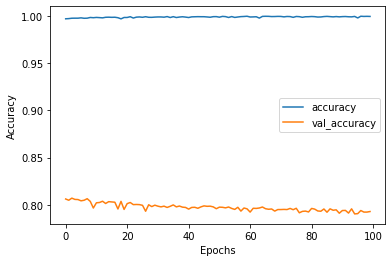

In [18]:
#Plotting Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [32]:
#Predicting Sentences - 1 if the record is sarcastic else 0
sentence = ["He just wants wife to listen, not come up with alternative debt-reduction ideas", 
            "Harry Potter is a great series of books"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen = MAX_LEN, padding = PADDING_TYPE,
                       truncating = TRUNC_TYPE)

predictions = model.predict(padded)

print(*predictions)

[0.999244] [3.340077e-22]
